<a href="https://colab.research.google.com/github/CST389-487-NLP/intro-to-github-you-need-too-sign-in-JeremiahKicks/blob/main/Intro_to_PyTorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H3><center><b>PyTorch</b><H3></center>
In this nb I use resuse some of the Sebastian Raschka's images and examples for his PyTorch in 1 hour lecture

Torch components at a glance


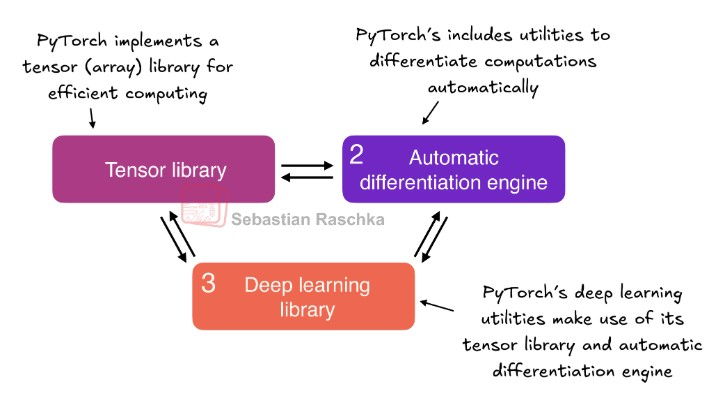

To start using PyTorch, you first need to install it. You need to install the correct version:
*   if no GPU then just PyTorch and possibly torchvision:

    pip install torch torchvision
*   If GPU then you would also need cudatoolkit. Cuda is installed with torch itself:

    pip install torch torchvision cudatoolkit=13.0.2

If you are installing locally then you need to choose correct version by going to https://pytorch.org/get-started/locally/ and choosing by clicking on the appropriate versions on this picture

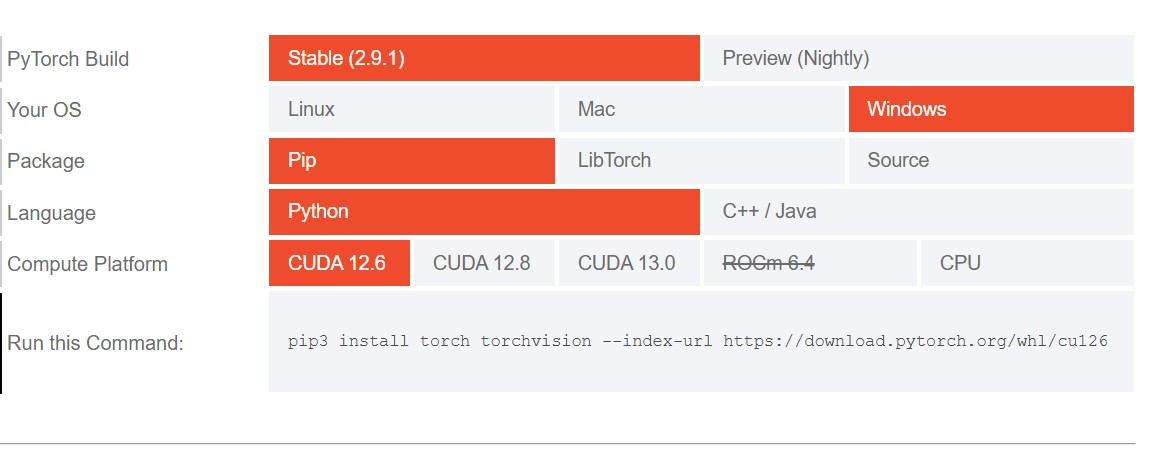
It will display correct installation command for you that you need to copy and run

In [ ]:
pip install torch torchvision

To check the version of PyTorch, you can execute the following code in PyTorch:

In [ ]:
import torch
torch.__version__

'2.9.0+cpu'

If you isntalled torch for cuda you can check if it recognizes your GP by running the following code in Python:

import torch torch.cuda.is_available()

IF RECOGNIZED This returns:

True

The main new data structure in Torch is tensor. It represent a mathematical concept that generalizes vectors and matrices to potentially higher dimensions. As a data structure it is a multi-dimensional array. PyTorch adopts the default 64-bit integer data type from Python. We can access the data type of a tensor via the .dtype attribute of a tensor. For example for vector:  

In [ ]:
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d.dtype)

torch.int64


If we create tensors from Python floats, PyTorch creates tensors with a 32-bit precision by default

In [ ]:
floatvec = torch.tensor([1.0, 2.0, 3.0])
print(floatvec.dtype)

torch.float32


Tensors can have arbiitrary sizes in different dimension. For example:

In [ ]:
tensor_3d = torch.tensor([[[1, 2, 3], [3, 4,5]],[[5,6,7],[9,10,11]]])
print("3D Tensor:")
print(tensor_3d)
print()

3D Tensor:
tensor([[[ 1,  2,  3],
         [ 3,  4,  5]],

        [[ 5,  6,  7],
         [ 9, 10, 11]]])



This tensor above is a cube of 2 layers in which each one is a matrix 2x3. Next is a random 3-d cube of 3 matrices each one being 3x2

In [ ]:
random_tensor = torch.rand(3, 3, 2)
print("Random Tensor (2x3x2):")
print(random_tensor)
print()

Random Tensor (2x3x2):
tensor([[[0.6928, 0.2160],
         [0.9326, 0.4390],
         [0.4354, 0.7384]],

        [[0.1344, 0.7487],
         [0.6525, 0.7446],
         [0.9550, 0.7672]],

        [[0.8117, 0.5690],
         [0.7217, 0.9671],
         [0.7762, 0.5439]]])



 it is possible to readily change the precision using a tensor’s .to method. The following code demonstrates this by changing a 64-bit integer tensor into a 32-bit float tensor:

In [ ]:
print(random_tensor.dtype)
float64_tensor = random_tensor.to(torch.float64)
print(float64_tensor.dtype)

torch.float32
torch.float64


<h4 style="text-align: center;">Tensor Operations in PyTorch</h4>

PyTorch operations are essential for manipulating data efficiently, especially when preparing data for machine learning tasks.

<b>Indexing:</b> Indexing lets you retrieve specific elements or smaller sections from a larger tensor.

<b>Slicing:</b> Slicing allows you to take out a portion of the tensor by specifying a range of rows or columns.

<b>Reshaping:</b> Reshaping changes the shape or dimensions of a tensor without changing its actual data. This means you can reorganize the tensor into a different size while keeping all the original values intact.

In [ ]:
tensor = torch.tensor([[1, 2], [3, 4], [5, 6]])

element = tensor[1, 0]
print(f"Indexed Element (Row 1, Column 0): {element}")
slice_tensor = tensor[:2, :]
print(f"Sliced Tensor (First two rows): \n{slice_tensor}")

reshaped_tensor = tensor.view(2, 3)
print(f"Reshaped Tensor (2x3): \n{reshaped_tensor}")

Indexed Element (Row 1, Column 0): 3
Sliced Tensor (First two rows): 
tensor([[1, 2],
        [3, 4]])
Reshaped Tensor (2x3): 
tensor([[1, 2, 3],
        [4, 5, 6]])


<h4> Linear Algebraic Operations and Complex Mathematical Operations</h4>

We can use .T to transpose a 2-D tensor, which means flipping it across its diagonal. Note that this is similar from reshaping a tensor as you can see based on the result below:

In [ ]:
new_tensor=random_tensor[:,:,0].T
print(new_tensor)

tensor([[0.6928, 0.1344, 0.8117],
        [0.9326, 0.6525, 0.7217],
        [0.4354, 0.9550, 0.7762]])


Matrix multiplication using @ operator is easy too:

In [ ]:
result=slice_tensor @ reshaped_tensor
print(result)

tensor([[ 9, 12, 15],
        [19, 26, 33]])


For vectors we can compute dot product in one step:

In [ ]:
v1 = torch.tensor([1.0, 2.0, 3.0])
v2 = torch.tensor([4.0, 5.0, 6.0])

# Using torch.dot()
result_dot = torch.dot(v1, v2)
print(f"Vector 1: {v1}")
print(f"Vector 2: {v2}")
print(f"Dot product: {result_dot}")

Vector 1: tensor([1., 2., 3.])
Vector 2: tensor([4., 5., 6.])
Dot product: 32.0


Torch allows more complex opearions, like sigmoid computer for a tensor, thus computing $\frac{1}{1+e^{-z}}$ for each element of the input_tensor below:

In [ ]:
input_tensor = torch.randn(2, 3)
print(f"Input tensor:\n{input_tensor}")

# Apply the sigmoid function
output_tensor = torch.sigmoid(input_tensor)
print(f"\nOutput tensor (sigmoid applied):\n{output_tensor}")

Input tensor:
tensor([[-1.0706, -1.6754, -1.1983],
        [-1.0794, -0.7591, -0.6680]])

Output tensor (sigmoid applied):
tensor([[0.2553, 0.1577, 0.2318],
        [0.2536, 0.3188, 0.3390]])


<h4 style="text-align: center;">Computation Graphs</h4>

It is literaly a directed graph of how opeartions are applied one after another. It lays out the sequence of calculations needed to compute the output. For example the following computational graph is implemented in the cell below:

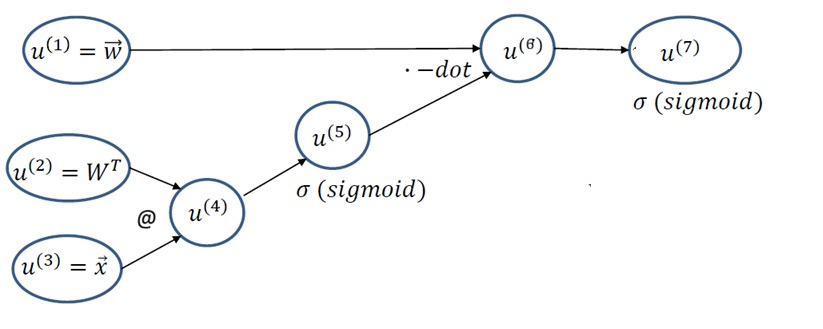

In [ ]:
u1 = v1
u2 = new_tensor
u3 = v2
u4 = u2.T @ v2
u5=torch.sigmoid(u4)
u6=torch.dot(u1,u5)
u7=torch.sigmoid(u6).unsqueeze(0)
print(u7)

tensor([0.9975])


In fact, PyTorch builds such a computation graph in the background, and we can use this to calculate gradients of a loss function with respect to the model parameters (here $W$ and $\vec{w}$) to train the model, which is the topic of the upcoming sections

<h4>The Automatic Differentiation Engine (autograd)</h4>

IN the computation that we did $W$ and $\vec{w}$ are trainable weight parameters. Suppose we ar are aiming for output 1. By tracking every operation performed on tensors, PyTorch’s autograd engine constructs a computational graph in the background. Then, calling the grad function, it can compute the gradient of the loss with respect to model parameters using chain rule.

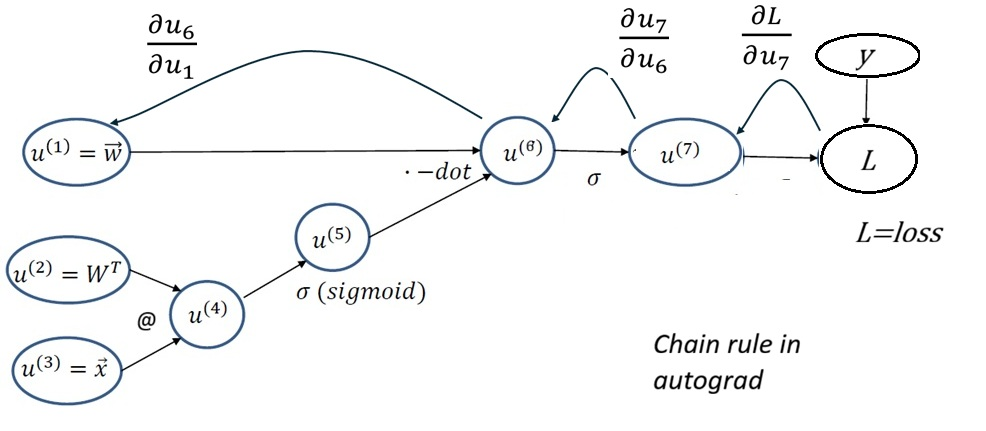
But we do not see this - it is doe automatically. So for example if we want the gradient with rspect to $\vec{w}$ we do this:


In [ ]:
import torch.nn.functional as F
from torch.autograd import grad
y = torch.tensor([1.0])
u1 = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
u2 = new_tensor.detach().clone().requires_grad_(True)
u3 = v2
u4 = u2.T @ v2
u5=torch.sigmoid(u4)
u6=torch.dot(u1,u5)
u7=torch.sigmoid(u6).unsqueeze(0)
loss = F.binary_cross_entropy(u7, y)
grad_loss_u1 = grad(loss, u1, retain_graph=True)
print(grad_loss_u1)

NameError: name 'new_tensor' is not defined

Here I used the grad function “manually,” which can be useful for experimentation, debugging, and demonstrating concepts. But in practice, PyTorch automatescomputation of gradients. Using .backward function on the loss, and PyTorch will compute the gradients of all the leaf nodes in the graph, which will be stored via the tensors’ .grad attributes:

In [ ]:
loss.backward()
print(u2.grad)
print(u1.grad)

tensor([[-4.2925e-07, -1.4363e-06, -2.9718e-07],
        [-5.3656e-07, -1.7954e-06, -3.7148e-07],
        [-6.4387e-07, -2.1544e-06, -4.4577e-07]])
tensor([-0.0025, -0.0025, -0.0025])


Let's see how simple linear regression works in this setting. Say we have mock insurance data given in pandas data frame. It contains are, are and price:

In [ ]:
! pip install pandas
import torch.nn.functional as F
from torch.autograd import grad
import pandas as pd

def normalize(df_input):
    return (df_input - df_input.min()) / (df_input.max() - df_input.min())


df = pd.DataFrame(
    {
        "area": [120, 180, 150, 210, 105],
           "age": [5, 2, 1, 2, 1],
        "price": [30, 90, 100, 180, 85]
    }
)
df = normalize(df)

Use this data tot tarin linear regression: age and area data is then input data and price is target variable

In [ ]:
X = torch.tensor(df[["area", "age"]].values, dtype=torch.float32)
Y = torch.tensor(df[["price"]].values, dtype=torch.float32)

Let's initialize weights and bias with random values. They need "require_grad" attribute so that they are trainable weights/bias.

In [ ]:
# These "require_grad" So they are trainable weights.
W = torch.rand(size=(2, 1), requires_grad=True)
B = torch.rand(1, requires_grad=True)
print('W=',W,'\n','B=', B)

W= tensor([[0.9305],
        [0.7014]], requires_grad=True) 
 B= tensor([0.0705], requires_grad=True)


let’s generate a prediction. The forward pass uses the matrix multiplication and addition, i.e. X @ W + B

In [ ]:
pred = X @ W + B

Now calculate the error as the mean square error loss. It calculates the distance between our current prediction and the ground truth. If we call loss.backward() we will also get the gradients of the trainable variables in the graph (i.e., W and B).

In [ ]:
dim_size=pred.shape[0]
loss=torch.mean((pred-Y)**2)

If we call loss.backward() we will also get the gradients of the trainable variables in the graph (i.e., W and B).

In [ ]:
loss.backward()
dW = W.grad # Tells us "how much W must change to reduce the loss"
dB = B.grad # and "how much B must change to reduce the loss

We now apply gradient descent with learning rate 0.2 to get new values of W and B:

In [ ]:
lr = 0.2
with torch.no_grad():
    W = W - lr * dW # Updating W with Gradient descent
    B = B - lr * dB # Updating B with Gradient descent
    print('new W=',W,'\n','new B=', B)

new W= tensor([[0.8768],
        [0.6153]]) 
 new B= tensor([-0.0334])


Let' now introduce Pytorch optimizers -the are algorithms (like SGD, Adam, or RMSprop) that adjust the model’s weights and biases based on the computed gradients to minimize the loss function.

In [ ]:
from torch.optim import SGD
optimizer = SGD(params = [W, B], lr=0.1)

The core loop for training models in PyTorch looks like this:
  - Forward pass to compute prediction
  - Calculate loss by finding the error between the prediction (pred) and the ground truth (Y)
  - Backward pass with loss.backward() to populate W.grad and B.grad.
  - Step with optimizer.step() to update parameters.
  - Zero gradients with optimizer.zero_grad() is used to clear the gradients of all optimized parameters before the start of a new iteration. This prevents the accumulation of gradients from previous passes, which would otherwise lead to incorrect updates of the model's parameters.

In [ ]:
#need to reiitialize weights and biases to ensure they have gradient
W = torch.rand(size=(2, 1), requires_grad=True)
B = torch.rand(1, requires_grad=True)
print('W=',W,'\n','B=', B,'\n')
optimizer = SGD(params = [W, B], lr=0.1)
for step in range(10):
    pred = X @ W + B # Forward pass
    loss = ((Y - pred) ** 2).mean() # Calculate loss
    loss.backward() # Calculate gradients
    optimizer.step() # Update W and B according to gradients
    optimizer.zero_grad() # Reset all gradients
print('new W=',W,'\n','new B=', B)

W= tensor([[0.4542],
        [0.0721]], requires_grad=True) 
 B= tensor([0.5918], requires_grad=True) 

new W= tensor([[ 0.4045],
        [-0.1113]], requires_grad=True) 
 new B= tensor([0.3164], requires_grad=True)
